# Textanalysis - Trump State of the Union - Homework 

In [62]:
import pandas as pd
%matplotlib inline
import glob

In [63]:
filenames = glob.glob("SOTU/*.txt")
contents = [open(filename).read() for filename in filenames]
sotu_df = pd.DataFrame({
    'content': contents,
    'filename': filenames
})
sotu_df.head(5)

,content,filename
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt
2,GENTLEMEN OF THE CONGRESS:\n\nSince I last had...,SOTU/1915.txt
3,GENTLEMEN OF THE CONGRESS:\n\nIn fulfilling at...,SOTU/1916.txt
4,Gentlemen of the Congress:\n\nEight months hav...,SOTU/1917.txt


In [64]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(sotu_df['content'])
vocab = vec.get_feature_names()
sotu_wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
sotu_wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000923,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
negative_words = emolex_df[emolex_df.negative == 1]['word']
joyful_words = emolex_df[emolex_df.joy == 1]['word']

In [67]:
sotu_df['negativity'] = sotu_wordcount_df[negative_words].sum(axis=1)
sotu_df['joyful'] = sotu_wordcount_df[joyful_words].sum(axis=1)
sotu_df.head()

,content,filename,negativity,joyful
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt,0.096346,0.076412
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt,0.121884,0.105263
2,GENTLEMEN OF THE CONGRESS:\n\nSince I last had...,SOTU/1915.txt,0.122637,0.085335
3,GENTLEMEN OF THE CONGRESS:\n\nIn fulfilling at...,SOTU/1916.txt,0.092334,0.080139
4,Gentlemen of the Congress:\n\nEight months hav...,SOTU/1917.txt,0.199780,0.097695


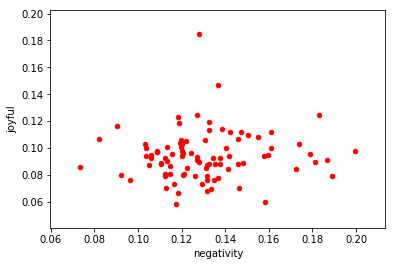

In [68]:
sotu_df.plot(x='negativity', y='joyful', kind='scatter', color='red')

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
matrix = vec.fit_transform(sotu_df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,000,000page,053,057,070,10,100,100th,101,102,...,zero,zeros,zest,zimbabwe,zinc,zion,zone,zones,zooming,ѕў
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,14,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
wordcount_df.sort_values(by='america', ascending=False).head()

,000,000page,053,057,070,10,100,100th,101,102,...,zero,zeros,zest,zimbabwe,zinc,zion,zone,zones,zooming,ѕў
70,11,0,0,0,0,4,3,0,0,0,...,1,0,0,0,0,0,0,1,0,0
71,13,0,0,0,0,3,3,0,0,0,...,1,1,0,0,0,0,0,1,0,0
79,3,0,0,0,0,2,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
87,4,0,0,0,0,8,1,0,0,0,...,2,0,0,0,0,0,0,0,0,0
77,2,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
wordcount_df[['america']].head()

,america
0,2
1,5
2,14
3,0
4,1


In [72]:
sotu_df['america'] = wordcount_df[['america']].sum(axis=1)#selects rows instead of columns

In [73]:
sotu_df['america'].head()

0     2
1     5
2    14
3     0
4     1
Name: america, dtype: int64

In [74]:
sotu_df.loc[88].content

'Mr. Speaker, Mr. Vice President, Members of Congress, my fellow Americans: We are 15 years into this new century. Fifteen years that dawned with terror touching our shores, that unfolded with a new generation fighting two long and costly wars, that saw a vicious recession spread across our Nation and the world. It has been and still is a hard time for many.\n\nBut tonight we turn the page. Tonight, after a breakthrough year for America, our economy is growing and creating jobs at the fastest pace since 1999. Our unemployment rate is now lower than it was before the financial crisis. More of our kids are graduating than ever before. More of our people are insured than ever before. And we are as free from the grip of foreign oil as we\'ve been in almost 30 years.\n\nTonight, for the first time since 9/11, our combat mission in Afghanistan is over. Six years ago, nearly 180,000 American troops served in Iraq and Afghanistan. Today, fewer than 15,000 remain. And we salute the courage and 

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

vocabulary=['america', 'nation', 'we']
# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(sotu_df['content'])
vocab = vec.get_feature_names()
sotu_wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
sotu_wordcount_df[vocabulary].head()

,america,nation,we
0,0.000574,0.001147,0.011761
1,0.001123,0.001572,0.029425
2,0.001836,0.001836,0.015078
3,0.000000,0.001928,0.004337
4,0.000259,0.002334,0.015301


In [82]:
sotu_wordcount_df[['america']].head()

,america
0,0.042553
1,0.034965
2,0.097902
3,0.000000
4,0.014493


In [91]:
sotu_df['america'] = sotu_wordcount_df[vocabulary].sum(axis=1)
sotu_df.head()

,content,filename,negativity,joyful,america
0,Gentlemen of the Congress:\n\nIn pursuance of ...,SOTU/1913.txt,0.096346,0.076412,0.013483
1,GENTLEMEN OF THE CONGRESS:\n\nThe session upon...,SOTU/1914.txt,0.121884,0.105263,0.032120
2,GENTLEMEN OF THE CONGRESS:\n\nSince I last had...,SOTU/1915.txt,0.122637,0.085335,0.018749
3,GENTLEMEN OF THE CONGRESS:\n\nIn fulfilling at...,SOTU/1916.txt,0.092334,0.080139,0.006265
4,Gentlemen of the Congress:\n\nEight months hav...,SOTU/1917.txt,0.199780,0.097695,0.017894


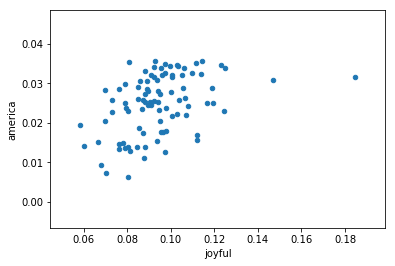

In [97]:
sotu_df.plot(y='america', x= 'joyful', kind='scatter')#, #ylim=(0,0.01), xlim=(0,0.005))